In [1]:
! mkdir ~/.kaggle

In [2]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
! kaggle datasets download grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
#unziping image files
!unzip //content/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [9]:
import os
import shutil

dataset_path = "/content/asl_alphabet_train/asl_alphabet_train"

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    # Check if it's a folder and its name is not a single letter
    if os.path.isdir(folder_path) and not (len(folder) == 1 and folder.isalpha()):
        shutil.rmtree(folder_path)
        print(f"Removed: {folder_path}")


Removed: /content/asl_alphabet_train/asl_alphabet_train/del
Removed: /content/asl_alphabet_train/asl_alphabet_train/nothing
Removed: /content/asl_alphabet_train/asl_alphabet_train/space


Final dataset shape: (78000, 64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
7501/10000 [D loss real: 1.8095252513885498 | D loss fake: 1.8096214532852173] [G loss: 0.06404302269220352]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
7502/10000 [D loss real: 1.809546709060669 | D loss fake: 1.8096427917480469] [G loss: 0.06403974443674088]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
7503/10000 [D loss real: 1.8095680475234985 | D loss fake: 1.8096641302108765] [G loss: 0.06403646618127823]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
7504/10000 [D loss real: 1.8095892667770386 | D loss fake: 1.8096853494644165] [G loss: 0.06403318792581558]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
7505/10000 [D loss real: 1.8096106052398682 | D loss fake: 1.8097068071365356] [G loss: 0.06402991712093353]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
7506/10000 [D loss real: 1.8096320629119873 | D loss fake: 1.8097281455993652] [G loss: 0.06402663886547089]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7507/10000 [D loss real: 1.809

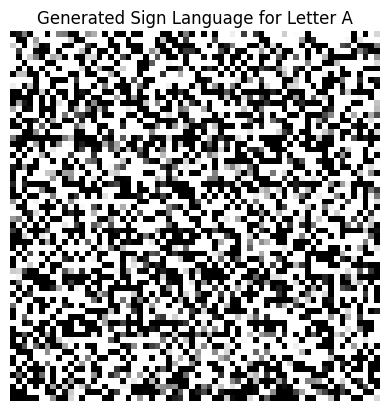

In [ ]:
import os
import shutil
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Embedding, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Dataset path
dataset_path = "/content/asl_alphabet_train/asl_alphabet_train"

# Step 1: Remove non-single-letter folders
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path) and not (len(folder) == 1 and folder.isalpha()):
        shutil.rmtree(folder_path)
        print(f"Removed: {folder_path}")

# Step 2: Load and preprocess images
IMG_SIZE = 64  # Target image size
LATENT_DIM = 100  # Latent space dimension
NUM_CLASSES = 26  # A-Z

def load_images(dataset_dir, img_size=IMG_SIZE):
    data = []
    labels = []

    for folder in sorted(os.listdir(dataset_dir)):  # Ensure sorted order (A-Z)
        folder_path = os.path.join(dataset_dir, folder)
        if os.path.isdir(folder_path):
            label = ord(folder) - ord('A')  # Convert letter to a numeric label (0-25)
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                try:
                    img = load_img(img_path, target_size=(img_size, img_size), color_mode="grayscale")
                    img_array = img_to_array(img) / 255.0  # Normalize pixel values
                    img_array = np.expand_dims(img_array, axis=-1)  # Ensure shape (64,64,1)
                    data.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Skipping {img_name}: {e}")

    return np.array(data), np.array(labels)

# Load the dataset
X, y = load_images(dataset_path)
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = tf.keras.utils.to_categorical(y, num_classes=NUM_CLASSES)  # One-hot encode labels

print("Final dataset shape:", X.shape)  # Should be (N, 64, 64, 1)

# Define the generator model
def build_generator(latent_dim, num_classes):
    noise_input = Input(shape=(latent_dim,))
    label_input = Input(shape=(num_classes,))

    merged_input = Concatenate()([noise_input, label_input])
    x = Dense(128 * 8 * 8, activation="relu")(merged_input)
    x = Reshape((8, 8, 128))(x)

    x = tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=2, padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(64, (4, 4), strides=2, padding='same', activation='relu')(x)
    img = tf.keras.layers.Conv2DTranspose(1, (4, 4), strides=2, padding='same', activation='tanh')(x)

    model = Model([noise_input, label_input], img)
    return model

def build_discriminator(img_shape, num_classes):
    img_input = Input(shape=img_shape)  # (64,64,1)
    label_input = Input(shape=(num_classes,))  # (26,)

    # Expand label input and reshape it to match image shape
    x = Dense(img_shape[0] * img_shape[1])(label_input)  # 64 * 64 = 4096
    x = Reshape((img_shape[0], img_shape[1], 1))(x)  # Reshape to (64, 64, 1)

    # Concatenate the image with the expanded label input
    merged = Concatenate()([img_input, x])  # Final shape: (64, 64, 2)

    x = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu")(merged)
    x = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = Flatten()(x)
    x = Dense(1, activation="sigmoid")(x)

    model = Model([img_input, label_input], x)
    return model


# Build and compile the GAN
img_shape = (IMG_SIZE, IMG_SIZE, 1)

discriminator = build_discriminator(img_shape, NUM_CLASSES)
discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy", metrics=["accuracy"])

generator = build_generator(LATENT_DIM, NUM_CLASSES)

z = Input(shape=(LATENT_DIM,))
label = Input(shape=(NUM_CLASSES,))
generated_img = generator([z, label])

discriminator.trainable = False
validity = discriminator([generated_img, label])

gan = Model([z, label], validity)
gan.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy")

# Training function for GAN
def train_gan(generator, discriminator, gan, X_train, y_train, epochs, batch_size):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs_real = X_train[idx]
        labels_real = y_train[idx]

        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        labels_fake = np.random.randint(0, NUM_CLASSES, half_batch)
        labels_fake = tf.keras.utils.to_categorical(labels_fake, num_classes=NUM_CLASSES)
        imgs_fake = generator.predict([noise, labels_fake])

        d_loss_real = discriminator.train_on_batch([imgs_real, labels_real], np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch([imgs_fake, labels_fake], np.zeros((half_batch, 1)))

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, LATENT_DIM))
        labels_gan = np.random.randint(0, NUM_CLASSES, batch_size)
        labels_gan = tf.keras.utils.to_categorical(labels_gan, num_classes=NUM_CLASSES)

        g_loss = gan.train_on_batch([noise, labels_gan], np.ones((batch_size, 1)))

        # Print the progress
        print(f"{epoch}/{epochs} [D loss real: {d_loss_real[0]} | D loss fake: {d_loss_fake[0]}] [G loss: {g_loss}]")

# Train the model
train_gan(generator, discriminator, gan, X, y, epochs=10000, batch_size=64)

# Function to generate an image for a given letter input
def generate_hand_sign_for_letter(letter):
    noise = np.random.normal(0, 1, (1, LATENT_DIM))
    label = np.zeros((1, NUM_CLASSES))
    label[0, ord(letter.upper()) - ord('A')] = 1

    generated_img = generator.predict([noise, label])
    generated_img = generated_img.reshape(IMG_SIZE, IMG_SIZE)

    plt.imshow(generated_img, cmap='gray')
    plt.title(f'Generated Sign Language for Letter {letter.upper()}')
    plt.axis('off')
    plt.show()

# Example usage: Generate a hand sign for letter 'A'
generate_hand_sign_for_letter('A')


In [5]:
# Save the generator model
generator.save("/content/generator_model.h5")

# Save the discriminator model
discriminator.save("/content/discriminator_model.h5")


In [13]:
from tensorflow.keras.models import load_model

# Load the saved generator model
generator = load_model("/content/generator_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


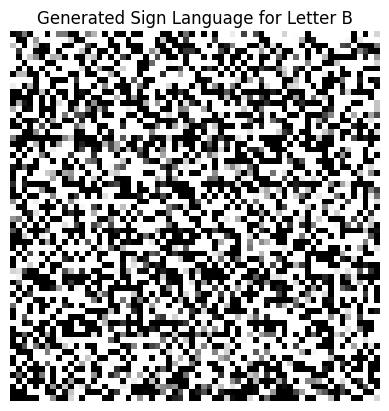

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hand_sign_for_letter(letter):
    LATENT_DIM = 100  # Same as used in training
    NUM_CLASSES = 26  # A-Z

    noise = np.random.normal(0, 1, (1, LATENT_DIM))  # Random noise
    label = np.zeros((1, NUM_CLASSES))
    label[0, ord(letter.upper()) - ord('A')] = 1  # One-hot encode letter

    generated_img = generator.predict([noise, label])
    generated_img = generated_img.reshape(64, 64)  # Reshape for display

    plt.imshow(generated_img, cmap='gray')
    plt.title(f'Generated Sign Language for Letter {letter.upper()}')
    plt.axis('off')
    plt.show()

# Example: Generate a sign for 'B'
generate_hand_sign_for_letter('B')
